# week3_mission

### Core Mission 1. Netfilx and Code

- **요구사항**
- 한국 작품은 총 얼마나 있는가?<br><br>

- **제한사항**
- country column을 기준으로 한다.
- "South Korea"인 경우만 인정한다. ("US, South Korea"는 인정하지 않음)<br>
<br>

#### 접근방식
1. 먼저 데이터에서 유실된 데이터가 있는지 확인
2. `country == South Korea`에 해당하는 데이터 키워드 확인
3. 한국 작품의 수 확인

In [574]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [575]:
# 넷플릭스 데이터 받기
NF_df = pd.read_csv("./netflix_titles.csv")
NF_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [576]:
# 1. 유실된 데이터 확인
# 데이터 정보 분석
NF_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


country 칼럼의 데이터 일부가 null데이터 인 것을 확인할 수 있다.<br>
모든 country의 데이터를 문자형 데이터로 처리하기 위해 Nan값(float형)을 갖는 데이터를 문자형 바꿔준다.

In [577]:
# 모든 country의 데이터를 문자형으로 바꿔줌 NaN 데이터는 '-'로 변경
NF_df.loc[NF_df['country'].isnull(), 'country'] = '-'
NF_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",-,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,-,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,-,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [578]:
# 2. country == South Korea에 해당하는 데이터 키워드 확인
# South Korea 확인
NF_df['country'].unique()

array(['United States', 'South Africa', '-', 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

In [579]:
# 그런데 South Korea와 , South Korea 두 개의 키워드가 존재
for n in NF_df['country'].unique():
    if 'South Korea' in n:
        print(n)

South Korea
, South Korea
South Korea, Czech Republic
United States, South Korea
Turkey, South Korea
China, Spain, South Korea, United States
Canada, South Korea, United States
India, United Kingdom, China, Canada, Japan, South Korea, United States
South Korea, United States
France, South Korea, Japan, United States
Indonesia, South Korea, Singapore
South Korea, Canada, United States, China
United States, South Korea, Japan
United States, Brazil, South Korea, Mexico, Japan, Germany
South Korea, China
South Korea, China, United States
France, South Korea, Japan
South Korea, Japan
United States, South Korea, China
China, South Korea, United States
United Kingdom, South Korea
South Korea, France
United States, India, South Korea, China
United States, United Kingdom, Spain, South Korea
Serbia, South Korea, Slovenia
United States, France, South Korea, Indonesia


Country칼럼에 South Korea만 들어 있는 데이터는 <br>
`country == South Korea` 또는 `country == , South Korea` <br>
위 두가지 경우를 확인할 수 있음. 이에 따라 두 가지 키워드에 따라 탐색.

In [580]:
# index 193번 D.P. 드라마의 country는 ", South Korea"로 입력되어 있음
NF_df[(NF_df['country'] == ', South Korea') | (NF_df['country'] == 'South Korea')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
104,s105,TV Show,Tayo the Little Bus,NaN,"Robyn Slade, Kami Desilets",South Korea,"September 6, 2021",2016,TV-Y,2 Seasons,"Kids' TV, Korean TV Shows",As they learn their routes around the busy cit...
124,s125,TV Show,Pororo - The Little Penguin,NaN,NaN,South Korea,"September 2, 2021",2013,TV-Y7,3 Seasons,"Kids' TV, Korean TV Shows","On a tiny island, Pororo the penguin has fun a..."
193,s194,TV Show,D.P.,NaN,"Jung Hae-in, Koo Kyo-hwan, Kim Sung-kyun, Son ...",", South Korea","August 27, 2021",2021,TV-MA,1 Season,"International TV Shows, TV Dramas",A young private’s assignment to capture army d...
289,s290,TV Show,The Crowned Clown,NaN,"Yeo Jin-goo, Lee Se-young, Kim Sang-kyung, Jun...",South Korea,"August 10, 2021",2019,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Standing in for an unhinged Joseon king, a loo..."
456,s457,TV Show,Her Private Life,NaN,"Park Min-young, Kim Jae-uk, Ahn Bo-hyun, Jung ...",South Korea,"July 15, 2021",2019,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","An art curator's life unravels, as she tries t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8463,s8464,Movie,The President's Barber,Chan-sang Lim,"Kang-ho Song, So-ri Moon, Jae-eung Lee, Yeong-...",South Korea,"October 1, 2017",2004,TV-MA,116 min,"Comedies, Dramas, International Movies","The personal barber to the president, as well ..."
8467,s8468,Movie,The Prison,Na Hyeon,"Suk-kyu Han, Rae-won Kim, Kyeong-yeong Lee, Wo...",South Korea,"November 18, 2017",2017,TV-MA,125 min,"Action & Adventure, Dramas, International Movies",A cop-turned-convict discovers a crime syndica...
8575,s8576,TV Show,This Is My Love,NaN,"Jin-mo Joo, Sa-rang Kim, Junior, Ja-in Lee, Su...",South Korea,"May 22, 2017",2015,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",A renowned actor who is still pining over the ...
8613,s8614,Movie,Train to Busan,Sang-ho Yeon,"Gong Yoo, Yu-mi Jung, Dong-seok Ma, Soo-an Kim...",South Korea,"March 18, 2017",2016,TV-MA,118 min,"Action & Adventure, Horror Movies, Internation...","As a zombie outbreak sweeps the country, a dad..."


결론: 총 **200개**의 한국 단독 작품이 있는 것을 확인할 수 있음
<br><br><br>
---

### Extra Mission 1.

- **요구사항**
- 가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가?<br><br>

- **제한사항**
- country column을 기준으로 한다.
- 단일 국가인 경우를 기준으로 결과를 구해보자.<br><br>

#### 접근방법
1. 위와 동일
2. 단일 국가에 해당하는 키워드를 정리
3. 국가당 작품의 수를 확인하여 가장 많은 작품이 올라간 국가를 확인

In [581]:
# country의 모든 데이터 값(키워드)
NF_df['country'].unique()

array(['United States', 'South Africa', '-', 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

In [582]:
# 2. 단일 국가에 해당하는 키워드를 정리
sin_country = []
for n in NF_df['country'].unique():
    a = n.split(',')
    if '' in a :
        a.remove('')
    if len(a) == 1 and a[0] != '-':
        sin_country.append(n)
sin_country

['United States',
 'South Africa',
 'India',
 'United Kingdom',
 'Mexico',
 'Turkey',
 'Australia',
 'Finland',
 'Nigeria',
 'Japan',
 'France',
 'Belgium',
 'South Korea',
 'Spain',
 'Russia',
 'Canada',
 'Hong Kong',
 ', South Korea',
 'Ireland',
 'Italy',
 'Argentina',
 'Jordan',
 'Colombia',
 'Brazil',
 'Taiwan',
 'Poland',
 'Germany',
 'New Zealand',
 'Saudi Arabia',
 'Thailand',
 'Indonesia',
 'Egypt',
 'Malaysia',
 'Israel',
 'Vietnam',
 'Sweden',
 'China',
 'Lebanon',
 'Romania',
 'Philippines',
 'Iceland',
 'Denmark',
 'United Arab Emirates',
 'Netherlands',
 'Mauritius',
 'Austria',
 'Cameroon',
 'United Kingdom,',
 'Kenya',
 'Uruguay',
 'Luxembourg',
 'Bangladesh',
 'Norway',
 'Senegal',
 'Singapore',
 'Kuwait',
 'Namibia',
 'Mozambique',
 'Belarus',
 'Ghana',
 'Chile',
 'Zimbabwe',
 'Hungary',
 'Cyprus',
 'Switzerland',
 'Pakistan',
 'Croatia',
 'Peru',
 'United States,',
 'Cambodia',
 'Bulgaria',
 'Georgia',
 'West Germany',
 'Venezuela',
 'Poland,',
 'Guatemala',
 'Ukrain

겹치는 데이터가 종종 있는 것을 확인 가능<br>
<br>
2-1. 우선은 해당 키워드에 해당하는 작품 수를 구해준 다음<br>
2-2. 국가별 작품 수를 합치는 작업을 수행

In [583]:
# 2-1. 우선은 해당 키워드에 해당하는 작품 수를 구해주기
# isin함수 기억!!
new_NF_df = NF_df.loc[NF_df['country'].isin(sin_country)]
new_NF_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
...,...,...,...,...,...,...,...,...,...,...,...,...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [584]:
ans_df = new_NF_df['show_id'].groupby(new_NF_df['country']).count()
ans_df

country
, South Korea     1
Argentina        56
Australia        87
Austria           5
Bangladesh        3
                 ..
Uruguay           3
Venezuela         1
Vietnam           7
West Germany      1
Zimbabwe          1
Name: show_id, Length: 77, dtype: int64

In [585]:
# 2-2. 국가별 작품 수를 합치기
ans_df.index

Index([', South Korea', 'Argentina', 'Australia', 'Austria', 'Bangladesh',
       'Belarus', 'Belgium', 'Brazil', 'Bulgaria', 'Cambodia', 'Cameroon',
       'Canada', 'Chile', 'China', 'Colombia', 'Croatia', 'Cyprus', 'Denmark',
       'Egypt', 'Finland', 'France', 'Georgia', 'Germany', 'Ghana',
       'Guatemala', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kenya', 'Kuwait',
       'Lebanon', 'Luxembourg', 'Malaysia', 'Mauritius', 'Mexico',
       'Mozambique', 'Namibia', 'Netherlands', 'New Zealand', 'Nigeria',
       'Norway', 'Pakistan', 'Peru', 'Philippines', 'Poland', 'Poland,',
       'Romania', 'Russia', 'Saudi Arabia', 'Senegal', 'Singapore',
       'South Africa', 'South Korea', 'Spain', 'Sweden', 'Switzerland',
       'Taiwan', 'Thailand', 'Turkey', 'Ukraine', 'United Arab Emirates',
       'United Kingdom', 'United Kingdom,', 'United States', 'United States,',
       'Uruguay', 'Venezuela', 'Vietnam', 'We

In [586]:
country_count = {}
for i in ans_df.index:
    keyword = i.strip(' ,')
    country_count[keyword] = country_count.get(keyword, 0) + ans_df[i]
country_count

{'South Korea': 200,
 'Argentina': 56,
 'Australia': 87,
 'Austria': 5,
 'Bangladesh': 3,
 'Belarus': 1,
 'Belgium': 9,
 'Brazil': 77,
 'Bulgaria': 1,
 'Cambodia': 1,
 'Cameroon': 1,
 'Canada': 181,
 'Chile': 14,
 'China': 66,
 'Colombia': 35,
 'Croatia': 1,
 'Cyprus': 1,
 'Denmark': 13,
 'Egypt': 106,
 'Finland': 1,
 'France': 124,
 'Georgia': 1,
 'Germany': 67,
 'Ghana': 3,
 'Guatemala': 1,
 'Hong Kong': 53,
 'Hungary': 4,
 'Iceland': 5,
 'India': 972,
 'Indonesia': 79,
 'Ireland': 10,
 'Israel': 13,
 'Italy': 45,
 'Japan': 245,
 'Jordan': 2,
 'Kenya': 3,
 'Kuwait': 6,
 'Lebanon': 15,
 'Luxembourg': 1,
 'Malaysia': 22,
 'Mauritius': 1,
 'Mexico': 110,
 'Mozambique': 1,
 'Namibia': 1,
 'Netherlands': 19,
 'New Zealand': 12,
 'Nigeria': 95,
 'Norway': 11,
 'Pakistan': 18,
 'Peru': 4,
 'Philippines': 75,
 'Poland': 25,
 'Romania': 6,
 'Russia': 15,
 'Saudi Arabia': 8,
 'Senegal': 1,
 'Singapore': 23,
 'South Africa': 30,
 'Spain': 145,
 'Sweden': 13,
 'Switzerland': 2,
 'Taiwan': 81,
 '

In [587]:
# 총 작품의 수가 2-1에서 추출한 작품 수 6661개와 동일한지 확인
sum(country_count.values())

6661

In [588]:
# 3. 국가당 작품의 수를 확인하여 가장 많은 작품이 올라간 국가를 확인
country, count = [(k, v) for k, v in country_count.items() if v == max(country_count.values())][0]
print(f"{country}이(가) {count}개로 가장 많은 작품을 보유하고 있음!")

United States이(가) 2819개로 가장 많은 작품을 보유하고 있음!


---
---
---

### Core Mission 2. 가즈아!

- **요구사항**
- 다음 데이터가 주어졌을 때 2016.6 ~ 2017.6 기간의 5-MA(Moving Average) 비트코인 가격 그래프를 그려주세요.<br>
<br>
- **제한사항**
- 선의 색깔은 노란색(#f2a900) 으로 해야합니다.
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
- 이동평균의 기준은 Open Column으로 계산합니다.
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.
- 이동평균(Moving Average)법은 시계열 데이터를 표현하는 데에 많이 사용하는 방법 중 하나입니다.

#### 접근방식

1. 데이터 정보 및 결손 데이터 확인
2. 2016년 6월부터 2017년 6월말 데이터까지 5일치 시작가의 평균을 구하기
3. 꺾은선 그래프로 이동평균선 그려주기
4. 그래프를 알아보기 쉽게하기 위한 정보 추가

In [589]:
# 데이터 불러오기
BC_df = pd.read_csv('./BitCoin.csv')
BC_df.tail(15)

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
1594,1594,2013-12-05,115.64,117.45,113.44,115.00,6704262.745,1288630000
1595,1595,2013-11-05,117.70,118.68,113.01,115.24,6820905.669,1311050000
1596,1596,2013-10-05,112.80,122.00,111.55,117.20,6534344.909,1255970000
1597,1597,2013-09-05,113.20,113.46,109.26,112.67,6555207.448,1259980000
1598,1598,2013-08-05,109.60,115.78,109.60,113.57,6344344.928,1219450000
1599,1599,2013-07-05,112.25,113.44,97.70,111.50,6495325.198,1248470000
1600,1600,2013-06-05,115.98,124.66,106.64,112.30,6708632.953,1289470000
1601,1601,2013-05-05,112.90,118.80,107.14,115.91,6528049.729,1254760000
1602,1602,2013-04-05,98.10,115.00,92.50,112.50,5670292.422,1089890000
1603,1603,2013-03-05,106.25,108.13,79.10,97.75,6139465.431,1180070000


In [590]:
# 1. 데이터 정보 및 결손 데이터 확인
# 결손 데이터 없음
BC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1609 entries, 0 to 1608
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1609 non-null   int64  
 1   Date        1609 non-null   object 
 2   Open        1609 non-null   float64
 3   High        1609 non-null   float64
 4   Low         1609 non-null   float64
 5   Close       1609 non-null   float64
 6   Volume      1609 non-null   float64
 7   Market Cap  1609 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 100.7+ KB


In [591]:
# 2. 2016년 6월부터 2017년 6월말 데이터까지 5일치 종가의 평균을 구하기

# 2-1. 날짜 순으로 정렬하여 데이터를 추출하여 새로운 DF생성
# sort_values(by = 'Data') 기억!!
sorted_df = BC_df.sort_values(by = 'Date')

In [592]:
# 정렬된 데이터의 인덱스를 리셋
# reset_index(기억)
sorted_df.reset_index(drop = True, inplace = True)
sorted_df

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
0,1605,2013-01-05,139.00,139.89,107.72,116.99,8.026719e+06,1542820000
1,1574,2013-01-06,128.81,129.78,127.20,129.30,7.521960e+06,1445800000
2,1544,2013-01-07,97.51,97.66,86.30,88.05,5.759986e+06,1107130000
3,1513,2013-01-08,106.21,108.00,103.01,104.00,6.348195e+06,1220190000
4,1482,2013-01-09,135.14,145.81,134.81,138.34,8.179728e+06,1572230000
...,...,...,...,...,...,...,...,...
1604,133,2017-12-05,1845.76,1856.15,1694.01,1724.24,7.409840e+08,30131100000
1605,102,2017-12-06,2953.22,2997.26,2518.56,2659.63,2.569530e+09,48391200000
1606,72,2017-12-07,2332.77,2423.71,2275.14,2398.84,1.117410e+09,38355900000
1607,41,2017-12-08,3650.63,3949.92,3613.70,3884.71,2.219590e+09,60242100000


In [593]:
# 날짜 순으로 계산이 될 수 있도록 데이터 추출
# 2016년 5월 28일 데이터부터 2017년 6월 30일 데이터 추출
print(sorted_df[sorted_df['Date'] == '2016-05-28'])
print(sorted_df[sorted_df['Date'] == '2017-06-30'])

      Unnamed: 0        Date    Open    High    Low   Close       Volume  \
1126         482  2016-05-28  473.03  533.47  472.7  530.04  181199000.0   

      Market Cap  
1126  7375780000  
      Unnamed: 0        Date     Open     High      Low    Close       Volume  \
1506          84  2017-06-30  2539.24  2559.25  2478.43  2480.84  860273000.0   

       Market Cap  
1506  41689100000  


In [594]:
# 필요한 정보는 날짜와 종가
n_BC_df = sorted_df.loc[1126:1506, :]
n_BC_df.reset_index(drop = True, inplace = True)
n_BC_df = n_BC_df[['Date', 'Open']]
n_BC_df

,Date,Open
0,2016-05-28,473.03
1,2016-05-29,527.48
2,2016-05-30,528.47
3,2016-05-31,534.19
4,2016-06-01,431.86
...,...,...
376,2017-06-26,2590.57
377,2017-06-27,2478.45
378,2017-06-28,2553.03
379,2017-06-29,2567.56


16.5.28 ~. 17.6.30 까지 총 399일인데 381일이 집계되었음<br>
어느 부분에서 결손데이터가 발생했는가??<br>

In [595]:
n_BC_df['Date'].unique()

array(['2016-05-28', '2016-05-29', '2016-05-30', '2016-05-31',
       '2016-06-01', '2016-06-02', '2016-06-03', '2016-06-04',
       '2016-06-05', '2016-06-06', '2016-06-07', '2016-06-08',
       '2016-06-09', '2016-06-10', '2016-06-11', '2016-06-12',
       '2016-06-13', '2016-06-14', '2016-06-15', '2016-06-16',
       '2016-06-17', '2016-06-18', '2016-06-19', '2016-06-20',
       '2016-06-21', '2016-06-22', '2016-06-23', '2016-06-24',
       '2016-06-25', '2016-06-26', '2016-06-27', '2016-06-28',
       '2016-06-29', '2016-06-30', '2016-07-01', '2016-07-02',
       '2016-07-03', '2016-07-04', '2016-07-05', '2016-07-06',
       '2016-07-07', '2016-07-08', '2016-07-09', '2016-07-10',
       '2016-07-11', '2016-07-12', '2016-07-13', '2016-07-14',
       '2016-07-15', '2016-07-16', '2016-07-17', '2016-07-18',
       '2016-07-19', '2016-07-20', '2016-07-21', '2016-07-22',
       '2016-07-23', '2016-07-24', '2016-07-25', '2016-07-26',
       '2016-07-27', '2016-07-28', '2016-07-29', '2016-

In [596]:
count_date = {}
for date in n_BC_df['Date'].unique():
    year, month, day = date.split('-')
    count_date[year + '-' + month] = count_date.get(year + '-' + month, 0) + 1
count_date

{'2016-05': 4,
 '2016-06': 30,
 '2016-07': 31,
 '2016-08': 31,
 '2016-09': 30,
 '2016-10': 31,
 '2016-11': 30,
 '2016-12': 31,
 '2017-01': 28,
 '2017-02': 25,
 '2017-03': 28,
 '2017-04': 27,
 '2017-05': 28,
 '2017-06': 27}

2017년 1월부터 6월까지 매달 각각 3일의 데이터가 결손된 것을 확인할 수 있음<br>
총 399 - 18 = 381로 18일의 데이터 결손 확인<br>
위에서 확인한 결과 매달 10, 11, 12일 데이터 결손

In [597]:
# 2-2. 결측치가 들어갈 행을 새로 만들어주기
add_data = {'Date': [f'2017-0{m}-{d}' for d in range(10, 13)  for m in range(1, 7)]}
add_df = pd.DataFrame(add_data, index = [i for i in range(18)])
add_df['Open'] = 0
n_BC_df = pd.concat([n_BC_df, add_df])
n_BC_df.sort_values(by = 'Date', inplace =True)
n_BC_df

,Date,Open
0,2016-05-28,473.03
1,2016-05-29,527.48
2,2016-05-30,528.47
3,2016-05-31,534.19
4,2016-06-01,431.86
...,...,...
376,2017-06-26,2590.57
377,2017-06-27,2478.45
378,2017-06-28,2553.03
379,2017-06-29,2567.56


In [598]:
n_BC_df.reset_index(drop = True, inplace = True)
n_BC_df = n_BC_df[['Date', 'Open']]
n_BC_df.tail(50)

,Date,Open
349,2017-05-12,0.00
350,2017-05-13,1723.12
351,2017-05-14,1800.86
352,2017-05-15,1808.44
353,2017-05-16,1741.70
354,2017-05-17,1726.73
355,2017-05-18,1818.70
356,2017-05-19,1897.37
357,2017-05-20,1984.24
358,2017-05-21,2067.03


In [599]:
# 2-3. 결측치 보간하기
# 9일의 종가와 13일의 종가를 선형적으로 잇는다고 가정할 때 25%, 50%, 75%에 위치하는 값을 넣어주기
def interpolation(day_9, day_13, i):
    dif = (day_13 - day_9) / 4
    n_BC_df.loc[i, 'Open'] = day_9 + dif
    n_BC_df.loc[i + 1, 'Open'] = day_9 + 2 * dif
    n_BC_df.loc[i + 2, 'Open'] = day_9 + 3 * dif

for i in range(200, 399):
    if not n_BC_df.loc[i, 'Open']:
        interpolation(n_BC_df.loc[i - 1, 'Open'], n_BC_df.loc[i + 3, 'Open'], i)

n_BC_df.tail(55)

,Date,Open
344,2017-05-07,2602.8700
345,2017-05-08,2897.6300
346,2017-05-09,4228.2900
347,2017-05-10,3601.9975
348,2017-05-11,2975.7050
349,2017-05-12,2349.4125
350,2017-05-13,1723.1200
351,2017-05-14,1800.8600
352,2017-05-15,1808.4400
353,2017-05-16,1741.7000


In [600]:
# 5-MA 계산
BC_price = [np.mean(n_BC_df['Open'][i - 4:i + 1]) for i in range(4, 399)]
date = [n_BC_df['Date'][i] for i in range(4, 399)]

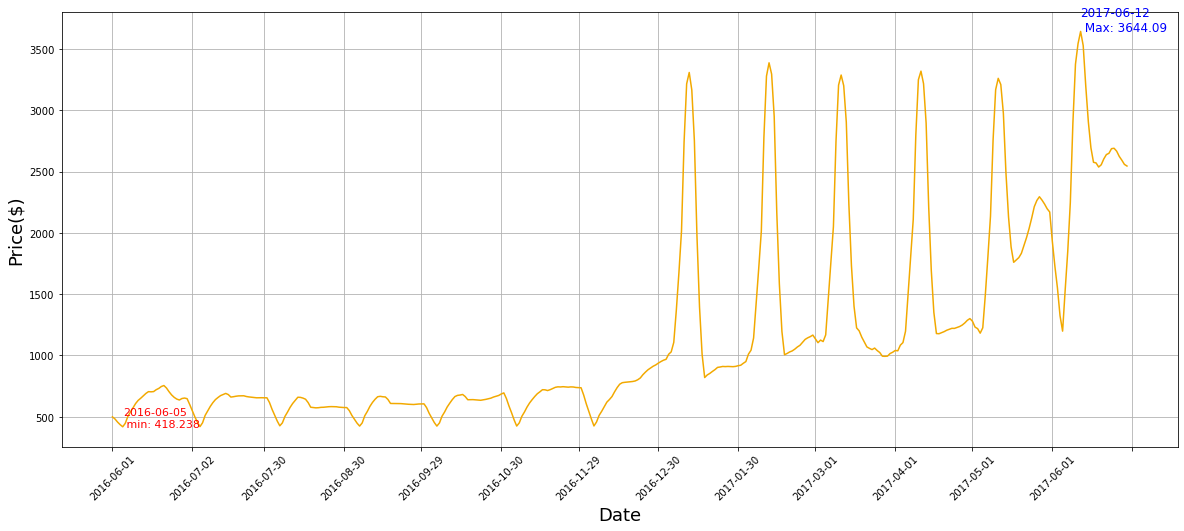

In [601]:
# 3. 꺾은선 그래프 그리기
# 이 때 x축 눈금은 날짜로 지정
from matplotlib import dates

plt.figure(figsize = (20, 8))

# 최대값, 최소값 구하기
for i, p in enumerate(BC_price):
    if p == max(BC_price):
        M = (i, p)
    if p == min(BC_price):
        m = (i, p)
plt.xticks(rotation=45)

ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator())

plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price($)', fontsize = 18)

# 4. 그래프 이외 정보 추가(최대값, 최소값)
plt.plot(date, BC_price, color = "#f2a900")
plt.text(date[M[0]], M[1], f"{date[M[0]]}\n Max: {M[1]}", color = "#0000ff", fontsize = 12)
plt.text(date[m[0]], m[1], f"{date[m[0]]}\n min: {m[1]}", color = "#ff0000", fontsize = 11)
plt.grid()
plt.show()

### Extra Mission 2.

- **요구사항**
- 2016.6 ~ 2017.6 기간에 해당하는 비트코인의 5-MA 그래프와 이더리움의 5-MA 그래프를 동시에 그리기
<br><br>
- **제한사항**
- 선의 색깔은 비트코인 : 노란색(#f2a900), 이더리움 : 검은색(#3c3c3d) 으로 해야합니다.
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
- 이동평균의 기준은 Open Column으로 계산합니다.
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다

#### 접근방식
- 이전 문제와 동일하게 5-MA를 구해서 그래프 그리기

In [602]:
# 데이터 가져오기
ETH_df = pd.read_csv('./ETH_day.csv')
ETH_df

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
0,2020-04-15,ETHUSD,158.61,158.61,158.61,158.61,0.00,0.00
1,2020-04-14,ETHUSD,156.97,162.15,155.74,158.61,18061.58,2872210.44
2,2020-04-13,ETHUSD,158.56,159.51,150.12,156.97,15698.32,2416728.28
3,2020-04-12,ETHUSD,158.66,165.37,155.21,158.56,12877.33,2082804.05
4,2020-04-11,ETHUSD,158.26,161.49,154.25,158.66,13761.72,2172914.57
...,...,...,...,...,...,...,...,...
1433,2016-05-13,ETHUSD,10.20,11.59,10.20,10.69,1769.71,18923.55
1434,2016-05-12,ETHUSD,10.43,12.00,9.92,10.20,2072.56,22183.39
1435,2016-05-11,ETHUSD,9.68,10.47,9.68,10.43,3052.51,30978.11
1436,2016-05-10,ETHUSD,9.98,9.98,9.36,9.68,672.06,6578.20


In [603]:
# 결측 데이터 없음
ETH_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1438 non-null   object 
 1   Symbol      1438 non-null   object 
 2   Open        1438 non-null   float64
 3   High        1438 non-null   float64
 4   Low         1438 non-null   float64
 5   Close       1438 non-null   float64
 6   Volume ETH  1438 non-null   float64
 7   Volume USD  1438 non-null   float64
dtypes: float64(6), object(2)
memory usage: 90.0+ KB


In [604]:
# 날짜순으로 정렬하기
ETH_df.sort_values(by = 'Date', inplace = True)
ETH_df

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
1437,2016-05-09,ETHUSD,12.00,12.00,9.36,9.98,1317.90,12885.06
1436,2016-05-10,ETHUSD,9.98,9.98,9.36,9.68,672.06,6578.20
1435,2016-05-11,ETHUSD,9.68,10.47,9.68,10.43,3052.51,30978.11
1434,2016-05-12,ETHUSD,10.43,12.00,9.92,10.20,2072.56,22183.39
1433,2016-05-13,ETHUSD,10.20,11.59,10.20,10.69,1769.71,18923.55
...,...,...,...,...,...,...,...,...
4,2020-04-11,ETHUSD,158.26,161.49,154.25,158.66,13761.72,2172914.57
3,2020-04-12,ETHUSD,158.66,165.37,155.21,158.56,12877.33,2082804.05
2,2020-04-13,ETHUSD,158.56,159.51,150.12,156.97,15698.32,2416728.28
1,2020-04-14,ETHUSD,156.97,162.15,155.74,158.61,18061.58,2872210.44


In [605]:
# 16년 5월 28일, 17년 6월 30일 인덱스 구하기
print(ETH_df[ETH_df['Date'] == '2016-05-28'].index)
print(ETH_df[ETH_df['Date'] == '2017-06-30'].index)

Int64Index([1418], dtype='int64')
Int64Index([1020], dtype='int64')


In [606]:
# 16.5.28 ~ 17.6.30 추출
sorted_ETH_df = ETH_df.loc[1418:1020, :]
sorted_ETH_df

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
1418,2016-05-28,ETHUSD,11.39,12.27,10.41,11.81,10997.83,125407.35
1417,2016-05-29,ETHUSD,11.81,12.73,11.50,12.53,8275.37,99868.30
1416,2016-05-30,ETHUSD,12.53,12.79,12.41,12.66,7805.15,98059.56
1415,2016-05-31,ETHUSD,12.66,14.35,12.52,14.18,15674.97,212221.49
1414,2016-06-01,ETHUSD,14.18,14.35,13.54,13.95,6390.06,89027.81
...,...,...,...,...,...,...,...,...
1024,2017-06-26,ETHUSD,278.73,299.90,210.00,253.00,249076.24,60950252.99
1023,2017-06-27,ETHUSD,253.00,288.17,210.02,286.21,173179.40,42085473.60
1022,2017-06-28,ETHUSD,286.21,324.95,260.49,317.59,184030.56,54573461.77
1021,2017-06-29,ETHUSD,317.59,322.84,285.23,293.80,152271.32,46521350.06


399개의 행이 제대로 보존되어 있음(결측치 없음)

In [607]:
# open과, Date추출
n_ETH_df = sorted_ETH_df[['Date', 'Open']]
n_ETH_df

,Date,Open
1418,2016-05-28,11.39
1417,2016-05-29,11.81
1416,2016-05-30,12.53
1415,2016-05-31,12.66
1414,2016-06-01,14.18
...,...,...
1024,2017-06-26,278.73
1023,2017-06-27,253.00
1022,2017-06-28,286.21
1021,2017-06-29,317.59


In [608]:
# 인덱스 초기화
n_ETH_df.reset_index(drop = True, inplace = True)
n_ETH_df

,Date,Open
0,2016-05-28,11.39
1,2016-05-29,11.81
2,2016-05-30,12.53
3,2016-05-31,12.66
4,2016-06-01,14.18
...,...,...
394,2017-06-26,278.73
395,2017-06-27,253.00
396,2017-06-28,286.21
397,2017-06-29,317.59


In [609]:
# 5-MA 계산
ETH_price = [np.mean(n_ETH_df['Open'][i - 4:i + 1]) for i in range(4, 399)]
ETH_price

[12.514,
 13.026,
 13.443999999999999,
 13.741999999999999,
 13.982,
 13.928,
 13.969999999999999,
 14.09,
 14.187999999999999,
 14.309999999999999,
 14.322,
 14.312000000000001,
 14.562000000000001,
 15.187999999999999,
 16.078,
 16.962,
 18.330000000000002,
 18.310000000000002,
 17.066000000000003,
 15.8,
 14.491999999999999,
 12.862,
 12.418,
 12.886,
 13.195999999999998,
 13.724,
 13.928,
 14.3,
 14.0,
 13.762,
 13.363999999999999,
 13.052000000000001,
 12.412,
 12.338,
 12.038,
 11.675999999999998,
 11.424,
 11.026,
 10.962,
 10.89,
 10.978000000000002,
 10.944,
 11.097999999999999,
 10.935999999999998,
 11.022,
 11.236,
 11.11,
 11.200000000000001,
 11.278,
 11.367999999999999,
 11.458,
 12.035999999999998,
 12.72,
 13.38,
 13.454000000000002,
 13.674000000000001,
 13.504,
 13.224,
 12.992,
 13.12,
 12.919999999999998,
 12.854,
 12.434,
 11.48,
 10.972,
 10.75,
 10.652,
 10.610000000000001,
 11.108,
 11.32,
 11.468,
 11.654,
 11.798,
 11.974,
 12.020000000000001,
 11.786,
 11.588

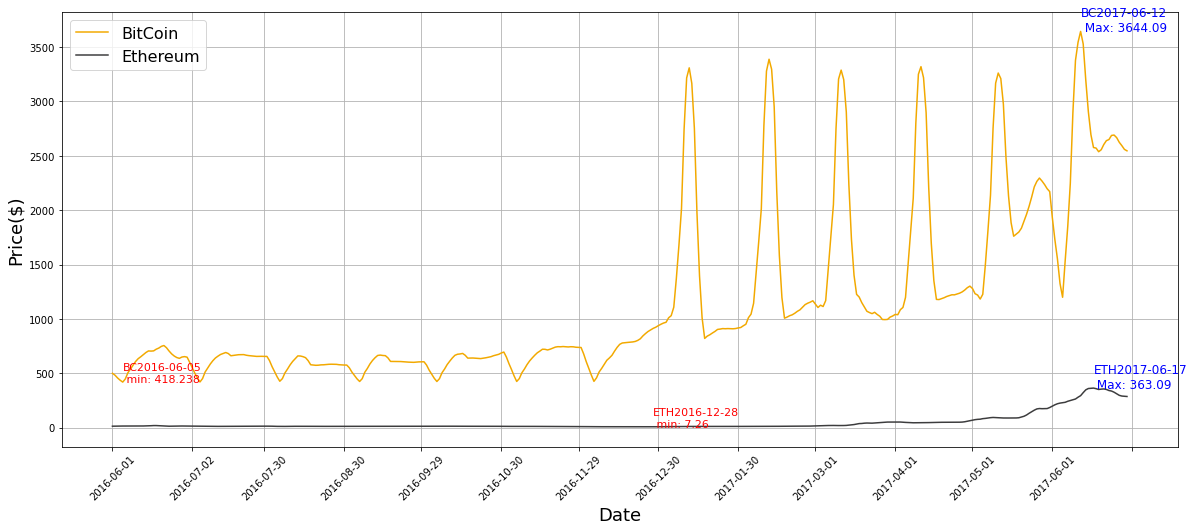

In [610]:
# 그래프 그리기
# 이 때 x축 눈금은 날짜로 지정
from matplotlib import dates

plt.figure(figsize = (20, 8))

# 이더리움 최대값, 최소값 구하기
for i, p in enumerate(ETH_price):
    if p == max(ETH_price):
        E_M = (i, p)
    if p == min(ETH_price):
        E_m = (i, p)
plt.xticks(rotation=45)

ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator())

plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price($)', fontsize = 18)

plt.plot(date, BC_price, label = 'BitCoin', color = "#f2a900")
plt.plot(date, ETH_price, label = 'Ethereum', color = "#3c3c3d")

plt.text(date[M[0]], M[1], f"BC{date[M[0]]}\n Max: {M[1]}", color = "#0000ff", fontsize = 12)
plt.text(date[m[0]], m[1], f"BC{date[m[0]]}\n min: {m[1]}", color = "#ff0000", fontsize = 11)

plt.text(date[E_M[0]], E_M[1], f"ETH{date[E_M[0]]}\n Max: {E_M[1]:.2f}", color = "#0000ff", fontsize = 12)
plt.text(date[E_m[0]], E_m[1], f"ETH{date[E_m[0]]}\n min: {E_m[1]:.2f}", color = "#ff0000", fontsize = 11)

plt.legend(loc = 'upper left', prop={'size':16})
plt.grid()
plt.show()

### 느낀점

직접 혼자서 처음부터 데이터를 불러와서 연산을 하고 데이터에 접근해서 원하는 데이터를 추출하고 그래프를 그려본적은 처음이다.<br>
이전에 타이타닉 튜토리얼을 할 때 유튜브 강의를 봐서 조금 수월할 줄 알았으나 1번 과제에서 정확히 입력되지 않은 칼럼값 처리,<br>
2번 과제에서 발생한 결측치에 대한 보간법에 대해 고민하는 과정에서 시간이 많이 걸렸으나 조금 더 넓은 시야를 가지고<br>
데이터를 처리를 해야겠다는 생각이 들었다. 결측치 보간법에 대해서는 조금 더 알아보고 학습질문을 통해 정확한 방법을 알아보도록 하겠다.